<a href="https://www.kaggle.com/code/huseyincosgun/prediction-of-developing-diabetes?scriptVersionId=164684908" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

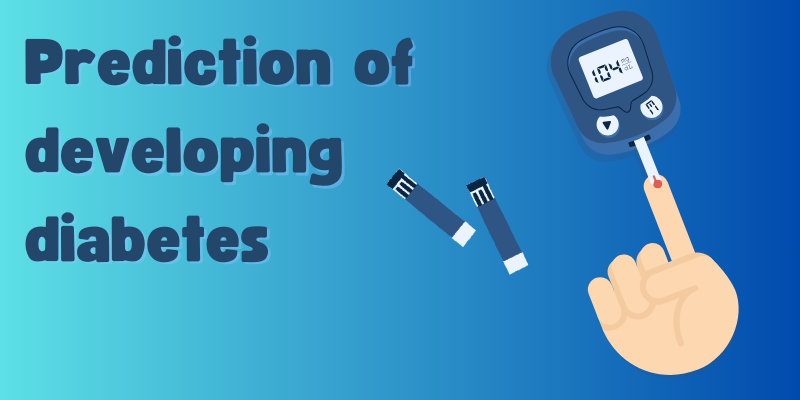

## <b><span style='color:#F1C40F'>1 |</span> About Dataset</b>

### <b><span style='color:#F1C40F'>Context</span></b>

The data used in this study originates from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The main goal of this dataset is to predict the presence or absence of diabetes in patients, utilizing specific diagnostic measurements present in the dataset. Strict criteria were applied to choose these cases from a larger database. Specifically, all individuals included in this dataset **are female, at least 21 years of age**, and of Pima Indian descent.

### <b><span style='color:#F1C40F'>Who is Pima Indians ?</span></b>
"The Pima (or Akimel O'odham, also spelled Akimel O'otham, **"River People"**, formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

### <b><span style='color:#F1C40F'>What is Diabetes ? </span></b>
Diabetes is a chronic medical condition that affects glucose metabolism. It occurs when the body either cannot produce enough insulin **(Type 1 diabetes)** or becomes resistant to insulin's effects **(Type 2 diabetes)**. Insulin is vital for regulating blood sugar levels, as it allows glucose to enter cells for energy. When insulin is impaired, glucose accumulates in the bloodstream, leading to high blood sugar levels. This condition can cause various symptoms such as frequent urination, excessive thirst, and fatigue. Diabetes requires careful management through medication, lifestyle changes, and monitoring to prevent complications that can affect the heart, kidneys, eyes, and nerves.

### <b><span style='color:#F1C40F'>Content</span></b>
The dataset comprises numerous medical predictor factors and one target variable, which is labeled as **"Outcome."** These predictor variables encompass the patient's history of **pregnancies, body mass index (BMI), insulin level, age, and other relevant parameters.**

### <b><span style='color:#F1C40F'>Purpose of the study</span></b>
- The main aim is to determine whether a patient is at risk of diabetes based on various characteristics and features.


### Dataset Attributes
- **Pregnancis** : Number of times pregnant
- **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure** : Diastolic blood pressure (mm Hg)
- **SkinThickness** : Triceps skin fold thickness (mm)
- **Insulin** : 2-Hour serum insulin (mu U/ml)
- **BMI** : Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction** : Diabetes pedigree function
- **Age** : Age (years)
- **Outcome** : Class variable (0 or 1) 268 of 768 are 1, the others are 0

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1 | Import Libraries and  Load Dataset</b></p>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

# Data processing, metrics and modeling
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Machine Learning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def load():
    data = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
    return data

df = load()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/pima-indians-diabetes-database/diabetes.csv
/kaggle/input/diabetes-data-set/diabetes.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/pimaindiansdiabetescsv/pima-indians-diabetes.csv


<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Exploratory Data Analysis</b></p>
</div>

In [2]:
df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.000,3.845,3.370,0.000,0.000,0.000,3.000,6.000,9.000,13.000,17.000
Glucose,768.000,120.895,31.973,0.000,57.000,79.000,117.000,140.250,167.000,196.000,199.000
BloodPressure,768.000,69.105,19.356,0.000,0.000,38.700,72.000,80.000,88.000,106.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,0.000,23.000,32.000,40.000,51.330,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,0.000,30.500,127.250,210.000,519.900,846.000
BMI,768.000,31.993,7.884,0.000,0.000,21.800,32.000,36.600,41.500,50.759,67.100
DPF,768.000,0.472,0.331,0.078,0.095,0.140,0.372,0.626,0.879,1.698,2.420
Age,768.000,33.241,11.760,21.000,21.000,21.000,29.000,41.000,51.000,67.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000


It is seen that the minimum values of some variables in the data set are 0. For example, a glucose or insulin value of 0 is a situation that cannot actually happen. Probably the NAN values are replaced with 0. It is a good start for us to detect these values.

In [3]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72.000,35.000,NaN,33.600,0.627,50,1
1,1,85.000,66.000,29.000,NaN,26.600,0.351,31,0
2,8,183.000,64.000,NaN,NaN,23.300,0.672,32,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40.000,35.000,168.000,43.100,2.288,33,1


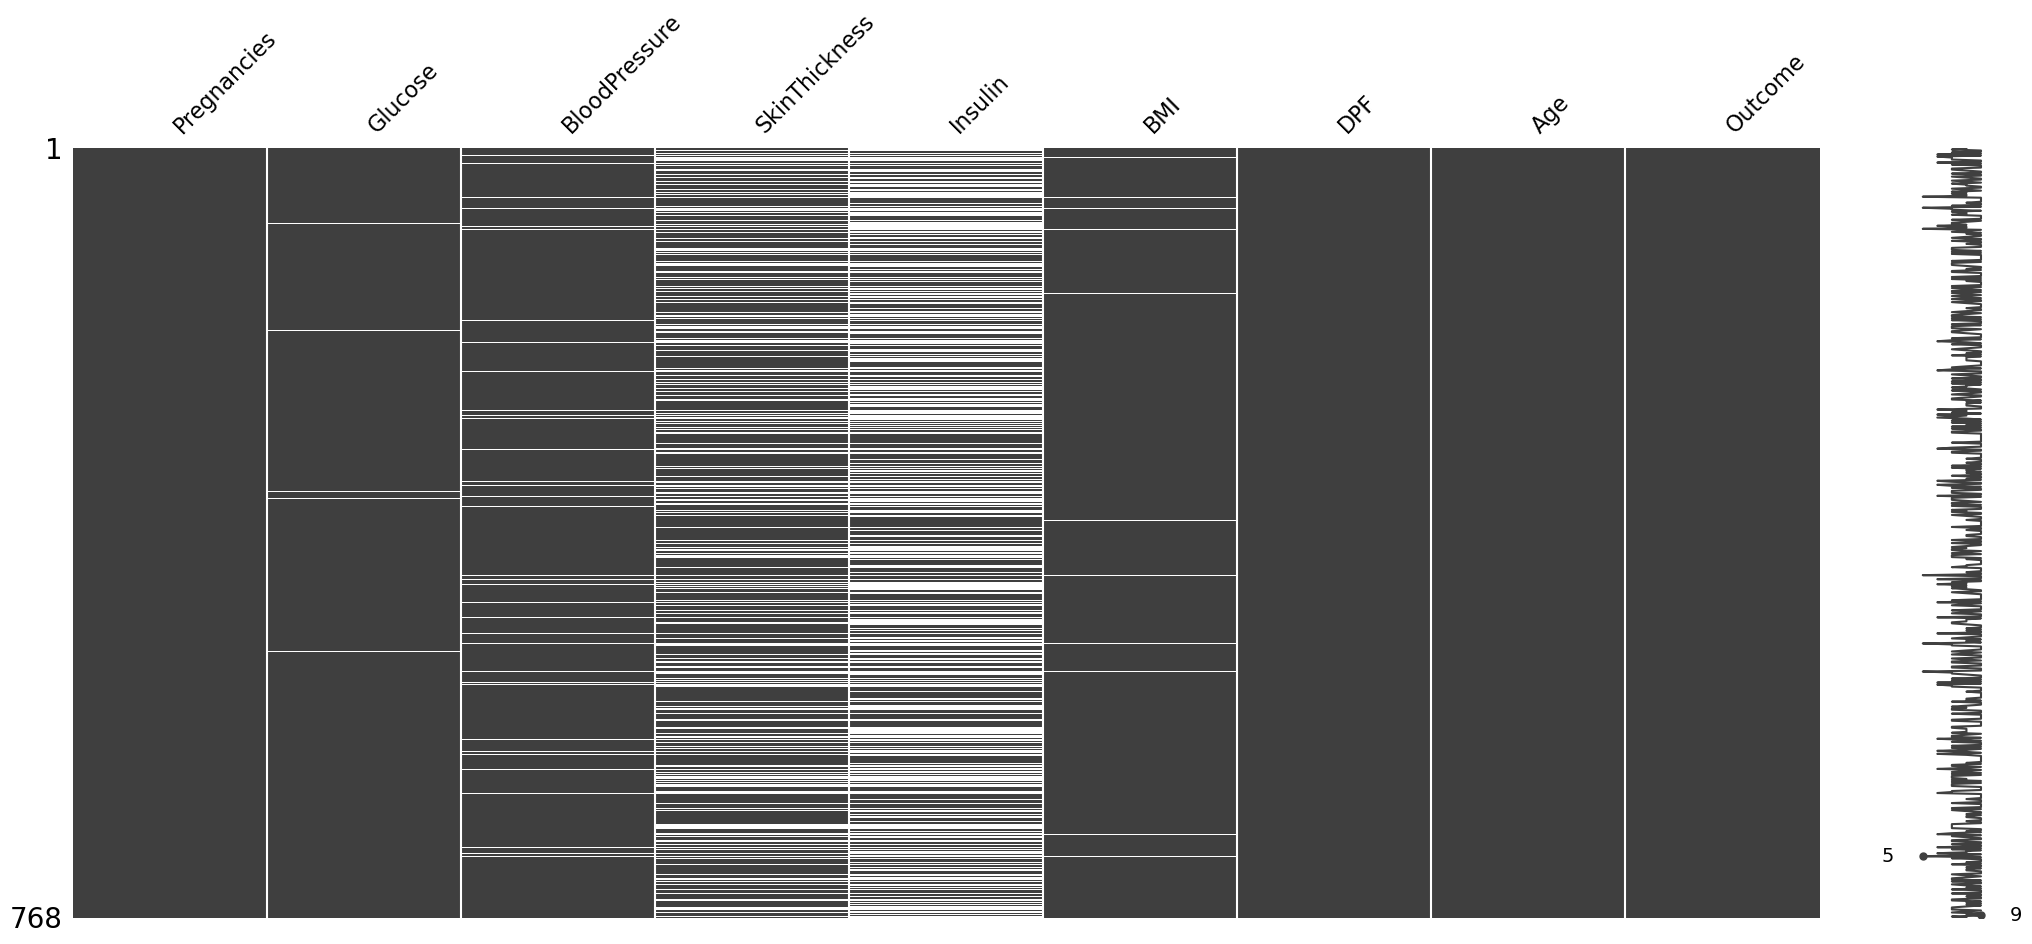

In [4]:
msno.matrix(df)
plt.show()

In [5]:
# Define missing plot to detect all missing values in dataset
import plotly.graph_objs as go
import plotly.offline as py
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [6]:
# Plotting 
missing_plot(df, 'Outcome')

#### Missing values :

- Insulin = 48.7% - 374
- SkinThickness = 29.56% - 227
- BloodPressure = 4.56% - 35
- BMI = 1.43% - 11
- Glucose = 0.65% - 5

In [7]:
def target_variable_distribution(data):
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15),
                   marker=dict(colors=['lightskyblue', 'orange']))
    
    layout = dict(title =  'Distribution of Target Variable (Outcome)')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

    
target_variable_distribution(df)

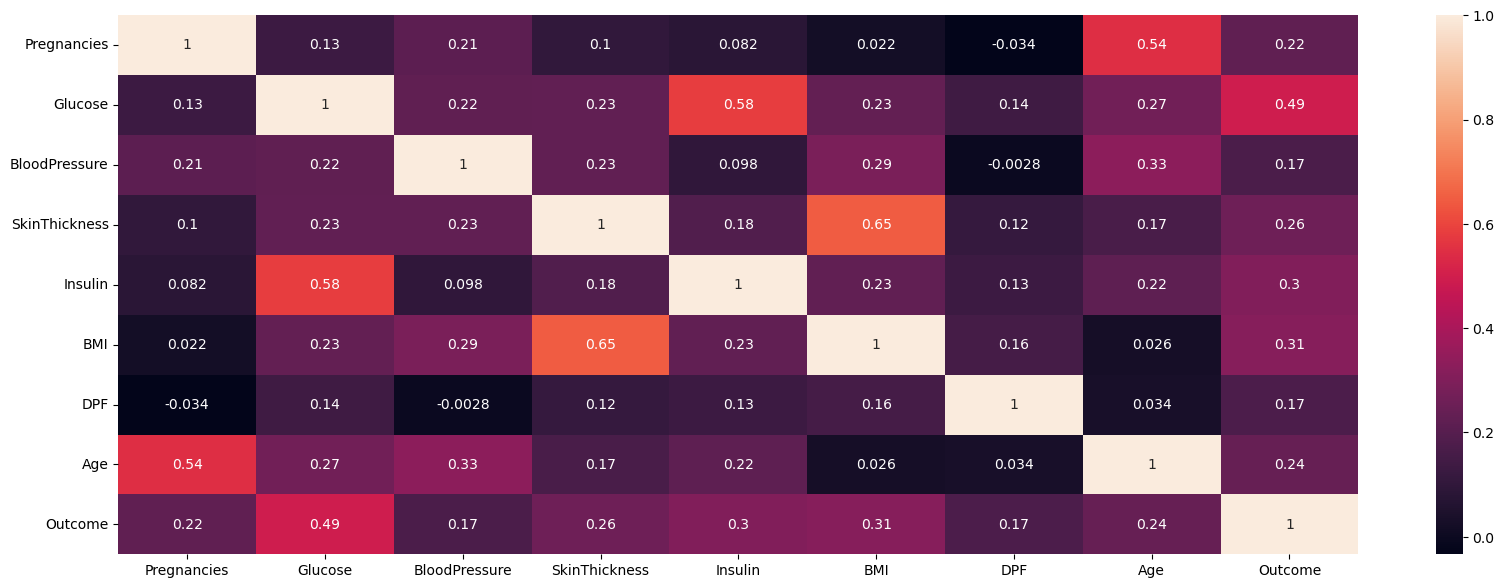

In [8]:
# The 2D correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Handling Missing Values</b></p>
</div>

**In the first study, we fill the missing values by taking the median according to the target variable[0-1].**

In [9]:
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def replace_missing_values(data, column:str):
    data.loc[(data['Outcome'] == 0 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[0]
    data.loc[(data['Outcome'] == 1 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[1]
    return data

for col in missing_cols:
    replace_missing_values(df, col)

df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Handling Outliers</b></p>
</div>

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    It provides the names of categorical, numerical, and categorical but cardinal variables.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables:
        cat_cols + num_cols + cat_but_car = number of variables

    """
    # cat_cols, cat_but_car
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [11]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DPF',
 'Age']

In [12]:
def check_classes(df):  
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq

check_classes(df)

,Unique Count
DPF,517
BMI,247
Insulin,187
Glucose,135
Age,52
SkinThickness,50
BloodPressure,47
Pregnancies,17
Outcome,2


In [13]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

low, up = outlier_thresholds(df, df.columns)

df_temp = df.describe([0.25, 0.50, 0.75, 0.95, 0.99]).T

df_temp.assign(**{"low_limit": low, "up_limit": up})

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


,count,mean,std,min,25%,50%,75%,95%,99%,max,low_limit,up_limit
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,10.000,13.000,17.000,-9.500,18.500
Glucose,768.000,121.677,30.464,44.000,99.750,117.000,140.250,181.000,196.000,199.000,-6.500,253.500
BloodPressure,768.000,72.389,12.106,24.000,64.000,72.000,80.000,90.000,106.000,122.000,24.000,120.000
SkinThickness,768.000,29.090,8.891,7.000,25.000,28.000,32.000,44.000,51.330,99.000,-5.500,62.500
Insulin,768.000,141.754,89.101,14.000,102.500,102.500,169.500,293.000,519.900,846.000,-54.725,320.675
BMI,768.000,32.435,6.880,18.200,27.500,32.050,36.600,44.395,50.759,67.100,4.058,60.437
DPF,768.000,0.472,0.331,0.078,0.244,0.372,0.626,1.133,1.698,2.420,-0.655,1.603
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,58.000,67.000,81.000,-14.000,82.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000,1.000,1.000,-1.500,2.500


In [14]:
# Check if there are any outliers?
def check_outlier(dataframe,col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DPF True
Age False


The outliers in the data set were analyzed by calculating the upper and lower limits with **q1=0.15** and **q3=0.85**. Variables with outliers in the dataset: 

- BloodPressure
- SkinThickness
- Insulin
- BMI
- DPF

In [15]:
outlier_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF']

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in outlier_cols:
    replace_with_thresholds(df, col)

In [16]:
for col in num_cols:
    print(col,check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DPF False
Age False


**Outlier Problem has solved.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>Feature Engineering</b></p>
</div>

**Let's analyze the behavior of the dependent variable by making combinations between the independent variables.**

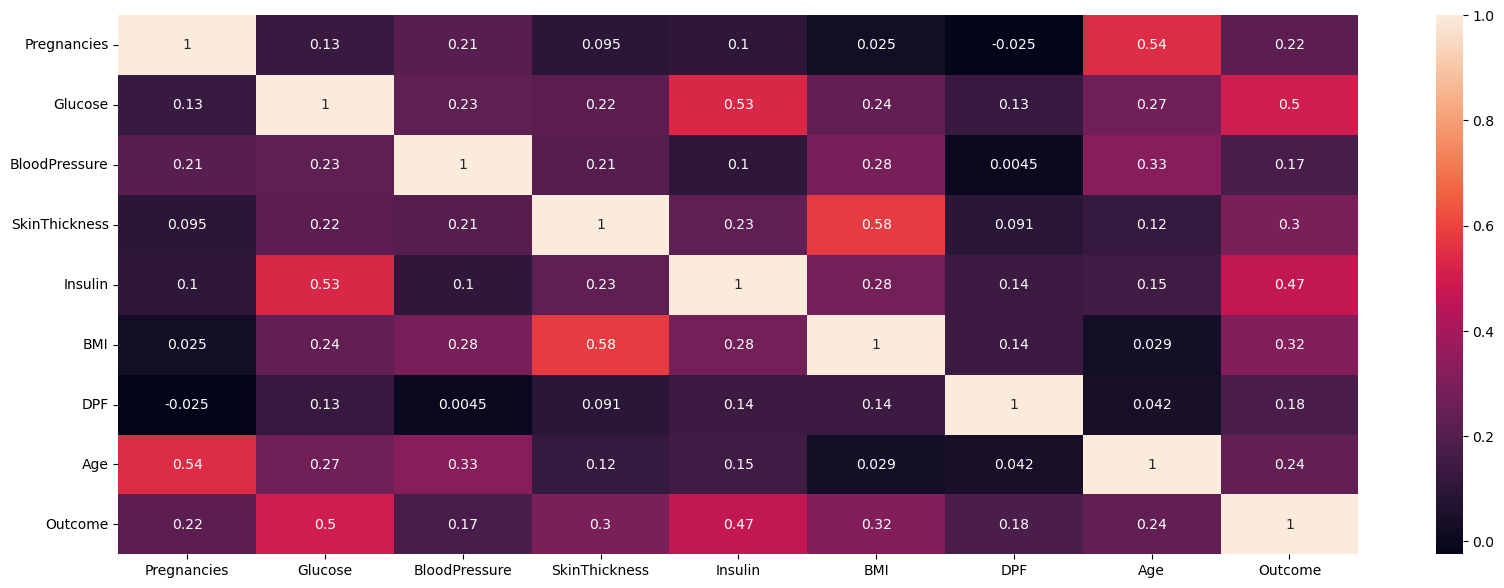

In [17]:
# The 2D correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [18]:
def plot_feat1_feat2(feat1, feat2) :  
    D = df[(df['Outcome'] != 0)]
    H = df[(df['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 0.8)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 0.8)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [19]:
def barplot(var_select, sub) :
    tmp1 = df[(df['Outcome'] != 0)]
    tmp2 = df[(df['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df[var_select],df['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

### Pregnancies
------------

<Axes: xlabel='Pregnancies', ylabel='Count'>

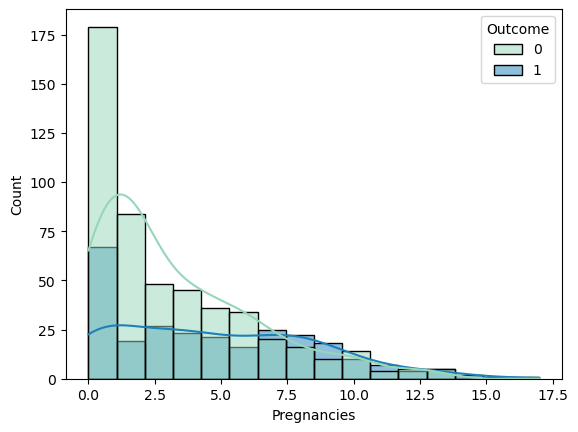

In [20]:
sns.histplot(data=df, x="Pregnancies", hue="Outcome",kde=True,palette="YlGnBu")

In [21]:
plot_feat1_feat2('Pregnancies', 'Age')

#### Healthy persons are concentrate with an Age <= 32 and Pregnancies <= 6

In [22]:
df.loc[:,'Preg_Age']= 1
df.loc[(df['Age']<=32) & (df['Pregnancies']<=6),'Preg_Age']=0

In [23]:
barplot('Preg_Age', ':Age <= 32 and Pregnancies <= 6')

### Glucose
-------------

<Axes: xlabel='Glucose', ylabel='Count'>

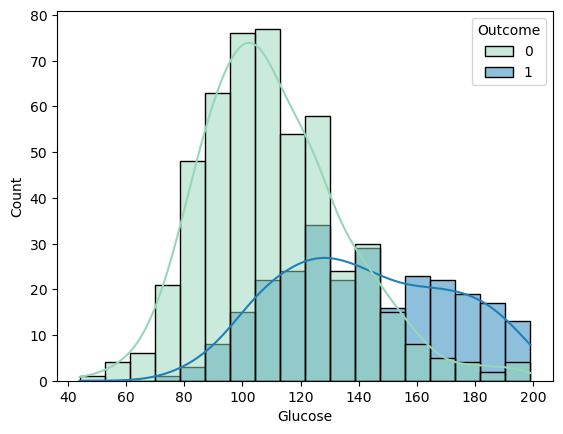

In [24]:
sns.histplot(data=df, x="Glucose", hue="Outcome",kde=True,palette="YlGnBu")

In [25]:
plot_feat1_feat2('Glucose', 'Insulin')

#### Healthy persons are concentrate with an Insulin <= 120 and Glucoes <= 126

In [26]:
df.loc[:,'Ins_Glu']= 1
df.loc[(df['Insulin']<=120) & (df['Glucose']<=126),'Ins_Glu']=0

In [27]:
barplot('Ins_Glu', '(Insulin <= 120 and Glucoes <= 126)')

### BloodPressure
--------------------

<Axes: xlabel='BloodPressure', ylabel='Count'>

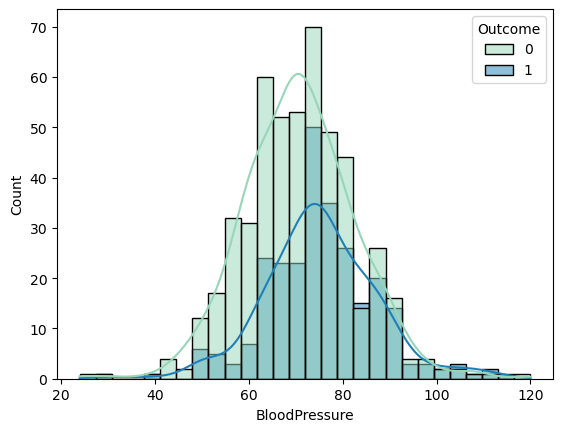

In [28]:
sns.histplot(data=df, x="BloodPressure", hue="Outcome",kde=True,palette="YlGnBu")

In [29]:
plot_feat1_feat2('BloodPressure', 'Age')

### Healthy persons are concentrate with an BloodPressure <= 90 and Age <= 29

In [30]:
df.loc[:,'BP_Age']= 1
df.loc[(df['BloodPressure']<=90) & (df['Age']<=29),'BP_Age']=0

In [31]:
barplot('BP_Age', '(BloodPressure <= 90 and Age <= 29)')

### SkinThickness
------

<Axes: xlabel='SkinThickness', ylabel='Count'>

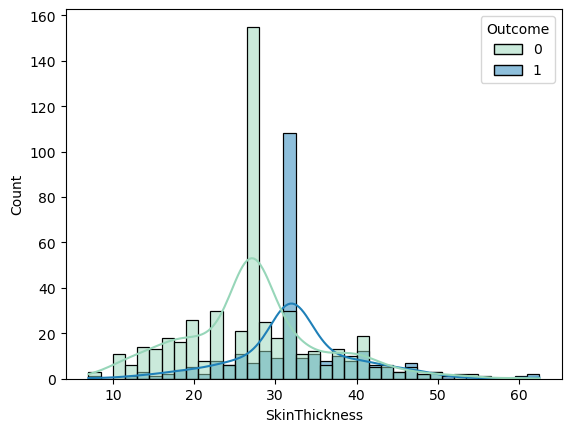

In [32]:
sns.histplot(data=df, x="SkinThickness", hue="Outcome",kde=True,palette="YlGnBu")

In [33]:
plot_feat1_feat2('SkinThickness', 'BMI')

In [34]:
df.loc[:,'ST_BMI']= 1
df.loc[(df['SkinThickness']<=31) & (df['BMI']<=30),'ST_BMI']=0

In [35]:
barplot('ST_BMI', '(SkinThickness <= 31 and BMI <= 30)')

### BMI
--------------

<Axes: xlabel='BMI', ylabel='Count'>

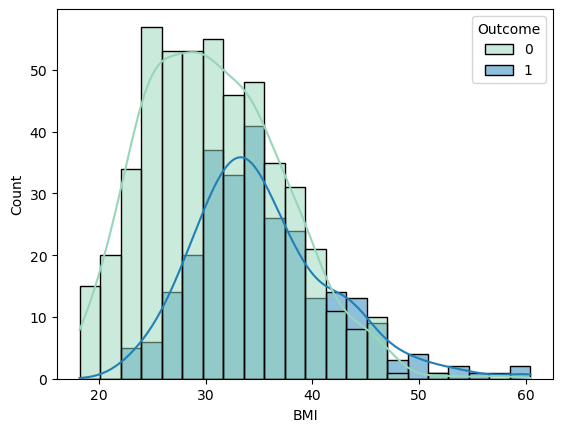

In [36]:
sns.histplot(data=df, x="BMI", hue="Outcome",kde=True,palette="YlGnBu")

### Check df with new features
-------------

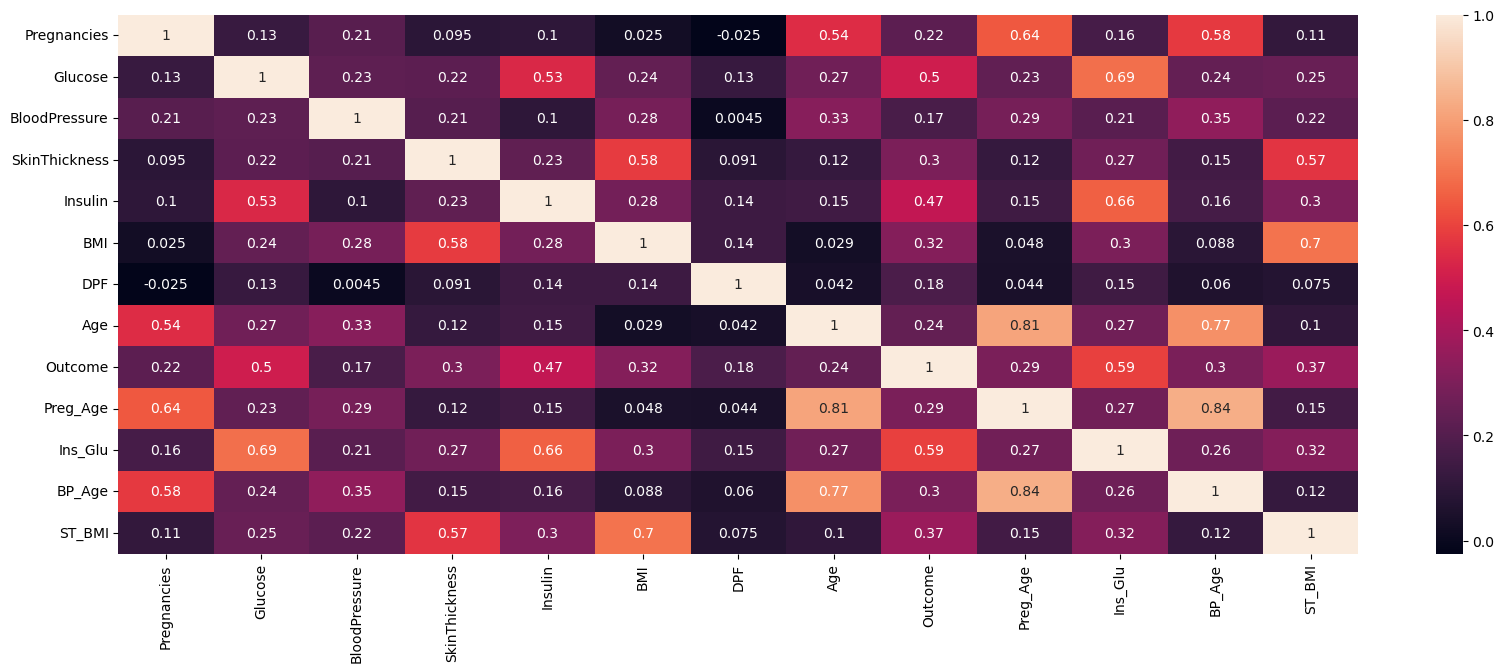

In [37]:
# The 2D correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap of corr
fig20, ax20 = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(data=corr_matrix, annot=True, ax=ax20)
plt.show()

In [38]:
data = df.copy()

In [39]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome,Preg_Age,Ins_Glu,BP_Age,ST_BMI
0,6,148.000,72.000,35.000,169.500,33.600,0.627,50,1,1,1,1,1
1,1,85.000,66.000,29.000,102.500,26.600,0.351,31,0,0,0,1,0
2,8,183.000,64.000,32.000,169.500,23.300,0.672,32,1,1,1,1,1
3,1,89.000,66.000,23.000,94.000,28.100,0.167,21,0,0,0,0,0
4,0,137.000,40.000,35.000,168.000,43.100,1.603,33,1,1,1,1,1


In [40]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols, drop_first = True)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

### Model

In [41]:
# Test-Train Split
random_state = 42

y = data['Outcome']
X = data.drop(['Outcome'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = random_state,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    shuffle = True)

In [42]:
# oversample
# The data is imbalanced. Therefore I use smote method to oversample the data

oversample = SMOTE(random_state=42, k_neighbors=10)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote
y_smote.value_counts()

0    400
1    400
Name: Outcome, dtype: int64

In [43]:
def make_classification(X_train, X_test, y_train, y_test):
    accuracy,f1,auc,= [],[],[]

    random_state = 42

    ##classifiers
    classifiers = []
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000))
    classifiers.append(XGBClassifier(random_state = random_state))
    classifiers.append(LGBMClassifier(random_state = random_state))
    classifiers.append(CatBoostClassifier(random_state = random_state, verbose = False))


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test,y_preds)))*100)
        f1.append(((f1_score(y_test,y_preds)))*100)
        auc.append(((roc_auc_score(y_test,y_probs[:,1])))*100)


    results_df = pd.DataFrame({"Accuracy Score":accuracy,
                        "f1 Score":f1,"Roc Score":auc,
                        "ML Models":["DecisionTree","AdaBoost",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors",
                                     "XGBoost", "LightGBM","CatBoost"]})

    results = (results_df.sort_values(by = ['Roc Score','f1 Score'], ascending = False)
                  .reset_index(drop =  True))
    
    return classifiers,results

classifiers,results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,Roc Score,ML Models
0,87.662,82.883,95.000,GradientBoosting
1,86.364,81.081,94.602,RandomForest
2,86.364,81.081,94.241,CatBoost
3,88.312,83.636,94.185,LightGBM
4,86.364,80.734,94.111,XGBoost
5,79.870,75.969,88.667,KNeighboors
6,82.468,76.522,82.241,AdaBoost
7,81.818,75.862,81.741,DecisionTree


0.8766233766233766 0.8288288288288288 0.9494444444444444


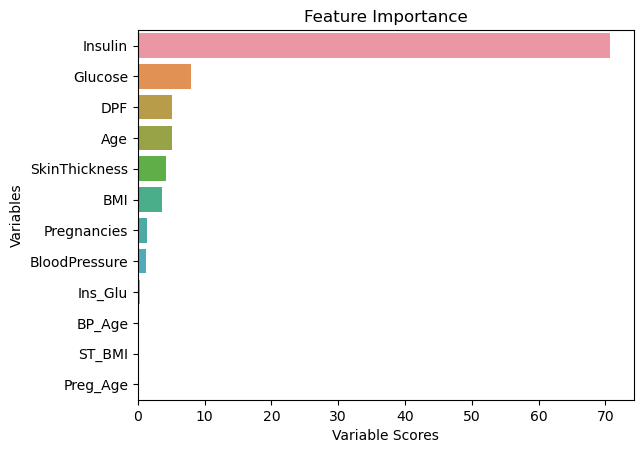

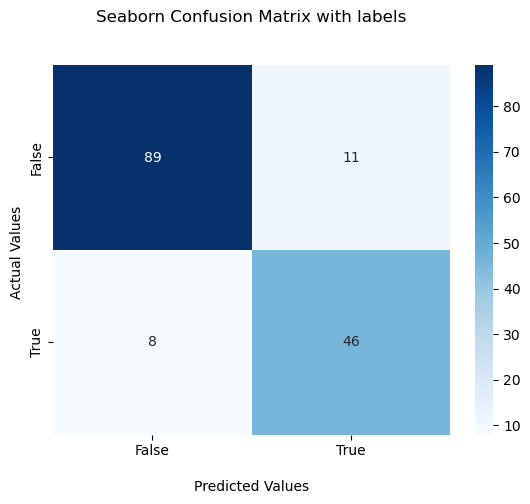

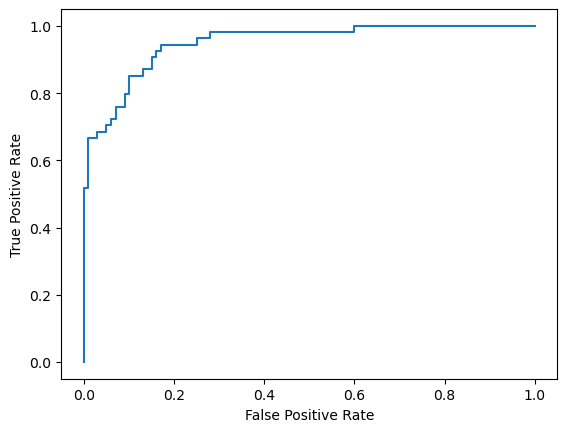

In [44]:
# Best Model
gbc_model = GradientBoostingClassifier()
gbc_model= gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
print(accuracy_score(y_test, gbc_pred),
     f1_score(y_test, gbc_pred),
     roc_auc_score(y_test,gbc_model.predict_proba(X_test)[:, 1]))

# Feature Importance
feature_imp = pd.Series(gbc_model.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x= feature_imp*100, y = feature_imp.index)
plt.xlabel("Variable Scores")
plt.ylabel("Variables")
plt.title("Feature Importance")
plt.show()

#create Confusion Matrix
cf_matrix = confusion_matrix(y_test, gbc_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#create ROC curve
y_pred_proba = gbc_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### General evaluation:

1- All values containing 0(zero) except Pregnancies and Outcome are assigned "NaN".

2- The distribution of missing data was examined.

3- Missing values were replaced by median assignments according to the target variable.

4- Variable types were examined and whether encoding was required or not was analyzed.

5- 15%-85% iqr calculation was made for the outlier values and they were replaced with the lower and upper limit values.

6- Robust was preferred for the scaling method. It was preferred because it has IQR sensitivity.

7- The weight of minority samples was reduced using SMOTE.

8- The model was tested using different machine learning methods.

9- Feature importance analysis was performed.

10- Confusion Matrix and ROC Curve are output.


### Major Mistakes:

- Since we filled the lost values of **48.7% in the insulin variable with the median**, weight accumulation occurred at 2 points. As in our example, it distorted the distribution of the data, causing it to make biased estimates. We understood why we need to be more careful while filling in missing data. As can be seen in the feature importance graph, it seems that the result is significantly related to the target variable. This was the wrong approach. We have to deal with this properly.

- The newly created features did not produce effective results. The purpose of **extracting new features** is to get better results. But we could not observe this here.

- No problems were observed as there were not many outliers. However, a more effective solve against outliers should be done by paying attention to the class distributions.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#2C3E50 ;font-size:110%;
            font-family:Helvetica;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>END OF THE FIRST PART</b></p>
</div>